## Installing the packages

In [1]:
# pip install dython

In [2]:
# pip install association_metrics

## Importing the libraries

In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from dython.nominal import associations

## Reading the dataset

In [2]:
cars_subset = pd.read_csv("cars_subset.csv", dtype={"vin": object, "back_legroom": object, "bed": object, "bed_height": object, "bed_length": object, "body_type": object, "cabin": object, "city": object, "city_fuel_economy": float, "combine_fuel_economy": float, "daysonmarket": int, "dealer_zip": object, "description": object, "engine_cylinders": object, "engine_displacement": float, "engine_type": object, "exterior_color": object, "fleet": object, "frame_damaged": object, "franchise_dealer": bool, "franchise_make": object, "front_legroom": object, "fuel_tank_volume": object, "fuel_type": object, "has_accidents": object, "height": object, "highway_fuel_economy": float, "horsepower": float, "interior_color": object, "isCab": object, "is_certified": float, "is_cpo": object, "is_new": bool, "is_oemcpo": object, "latitude": float, "length": object, "listed_date": object, "listing_color": object, "listing_id": int, "longitude": float, "main_picture_url": object, "major_options": object, "make_name": object, "maximum_seating": object, "mileage": float, "model_name": object, "owner_count": float, "power": object, "price": float, "salvage": object, "savings_amount": int, "seller_rating": float, "sp_id": float, "sp_name": object, "theft_title": object, "torque": object, "transmission": object, "transmission_display": object, "trimId": object, "trim_name": object, "vehicle_damage_category": float, "wheel_system": object, "wheel_system_display": object, "wheelbase": object, "width": object, "year": int})

## Exploratory Data Analysis

### Checking correlations between categorical variables using Cramer's V

Explanation:

Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t) Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

Reference: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [3]:
col_list = list(cars_subset.select_dtypes(include=['object']))
print(col_list)

['back_legroom', 'body_type', 'city', 'engine_cylinders', 'engine_type', 'exterior_color', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'interior_color', 'length', 'listing_color', 'make_name', 'maximum_seating', 'model_name', 'power', 'sp_name', 'torque', 'transmission', 'transmission_display', 'trim_name', 'wheel_system', 'wheel_system_display', 'wheelbase', 'width', 'state']


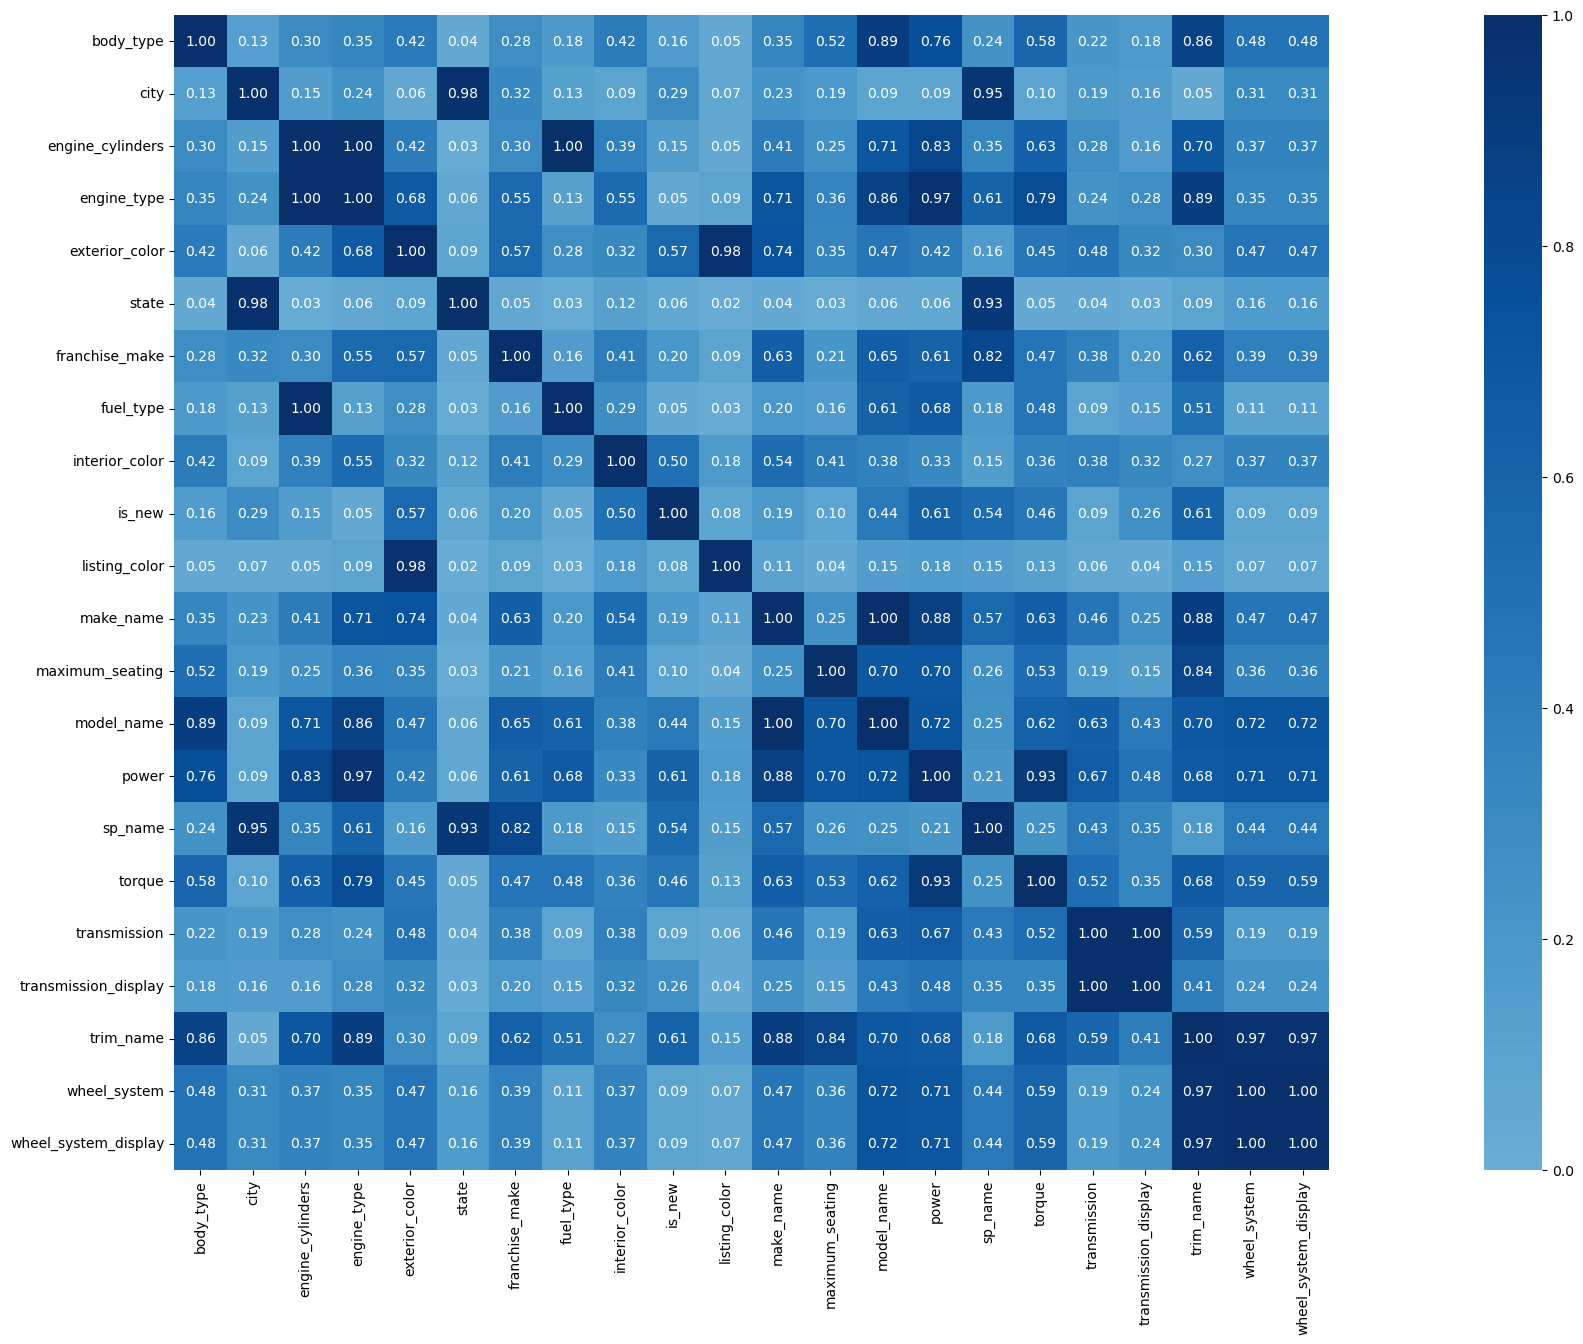

In [5]:
# Instantiate a figure and axis object
fig, ax = plt.subplots(figsize = (40, 15))

# Estimate and generate Cramer's V association plot
cramers_v = associations(cars_subset[['body_type', 'city', 'engine_cylinders', 'engine_type', 'exterior_color','state','franchise_make', 'fuel_type', 'interior_color', 'is_new', 'listing_color', 'make_name', 'maximum_seating', 'model_name', 'power', 'sp_name', 'torque', 'transmission', 'transmission_display', 'trim_name', 'wheel_system', 'wheel_system_display']],
                         nom_nom_assoc = 'cramer',
                         ax = ax,
                         cmap = "Blues")